<a href="https://colab.research.google.com/github/plantroots/titanic-dnn-classifier/blob/main/titanic_dnn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/titanic competition/dataset/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/titanic competition/dataset/test.csv")

**Features**: 
survival - Survival (0 = No; 1 = Yes);
Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd);
name - Name;
sex - Sex;
age - Age;
sibsp - Number of Siblings/Spouses Aboard;
parch - Number of Parents/Children Aboard;
ticket - Ticket Number;
fare - Passenger Fare;
cabin - Cabin;
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton);

In [ ]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [ ]:
test["Fare"].fillna(round(test["Fare"].mean(), 2), inplace = True)

train["Age"].fillna(round(train["Age"].mean(),2 ), inplace = True)
test["Age"].fillna(round(test["Age"].mean(),2 ), inplace = True)

train.drop("Cabin", axis="columns", inplace=True)
test.drop("Cabin", axis="columns", inplace=True)

train.drop("Name", axis="columns", inplace=True)
test.drop("Name", axis="columns", inplace=True)

train.drop("Ticket", axis="columns", inplace=True)
test.drop("Ticket", axis="columns", inplace=True)

train.drop("PassengerId", axis="columns", inplace=True)
# save the ids
test_ids = test["PassengerId"]
test.drop("PassengerId", axis="columns", inplace=True)

train["Embarked"].fillna("S", inplace=True)

def sex_convert(sex):
  if sex == "female":
    return 0
  elif sex == "male":
    return 1
  else:
    return sex

def embarked_convert(embarked):
  if embarked == "S":
    return 0
  elif embarked == "C":
    return 1
  elif embarked == "Q":
    return 2
  else:
    return embarked


train["Sex"] = train["Sex"].map(sex_convert)
test["Sex"] = test["Sex"].map(sex_convert)

train["Embarked"] = train["Embarked"].map(embarked_convert)
test["Embarked"] = test["Embarked"].map(embarked_convert)

In [ ]:
# # TRAIN TOTAL: 891
# # TEST TOTAL: 418
# print(train.isna().sum())
# print()
# print(test.isna().sum())

# **Distributions and Outliers**

In [ ]:
# def remove_outlier_fare(value):
#   mean = round(train["Fare"].mean(), 2)
#   if value > 60:
#     return mean
#   else:
#     return value

# train["Fare"] = train["Fare"].map(remove_outlier_fare)

Maximum Fare: 512.3292
Minimum Fare: 0.0
Average Fare: 32.2
Standard Deviation: 49.69



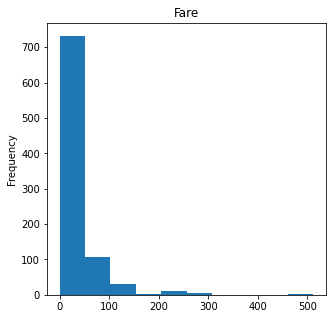

In [ ]:
context = "Fare"
print(f"Maximum {context}:", max(train[f"{context}"].unique()))
print(f"Minimum {context}:", min(train[f"{context}"].unique()))
print(f"Average {context}:", round(train[f"{context}"].mean(), 2))
print("Standard Deviation:", round(train[f"{context}"].std(), 2))
print()
train[f"{context}"].plot(kind="hist", figsize=(5,5), title=context)

In [ ]:
# def remove_outlier_sibsp(value):
#   mean = round(train["SibSp"].mean(), 2)
#   if value > 7:
#     return mean
#   else:
#     return value

# train["SibSp"] = train["SibSp"].map(remove_outlier_sibsp)

Maximum SibSp: 8
Minimum SibSp: 0
Average SibSp: 0.52
Standard Deviation: 1.1



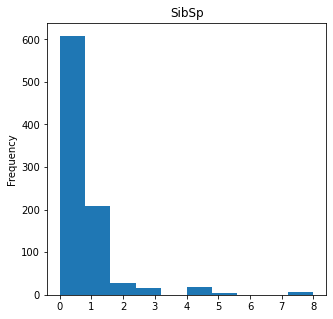

In [ ]:
context = "SibSp"
print(f"Maximum {context}:", max(train[f"{context}"].unique()))
print(f"Minimum {context}:", min(train[f"{context}"].unique()))
print(f"Average {context}:", round(train[f"{context}"].mean(), 2))
print("Standard Deviation:", round(train[f"{context}"].std(), 2))
print()
train[f"{context}"].plot(kind="hist", figsize=(5,5), title=context)

In [ ]:
# def remove_outlier_parch(value):
#   mean = round(train["Parch"].mean(), 2)
#   if value > 5:
#     return mean
#   else:
#     return value

# train["Parch"] = train["Parch"].map(remove_outlier_parch)

Maximum Parch: 6
Minimum Parch: 0
Average Parch: 0.38
Standard Deviation: 0.81



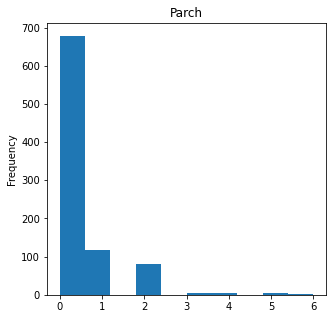

In [ ]:
context = "Parch"
print(f"Maximum {context}:", max(train[f"{context}"].unique()))
print(f"Minimum {context}:", min(train[f"{context}"].unique()))
print(f"Average {context}:", round(train[f"{context}"].mean(), 2))
print("Standard Deviation:", round(train[f"{context}"].std(), 2))
print()
train[f"{context}"].plot(kind="hist", figsize=(5,5), title=context)

Maximum Age: 80.0
Minimum Age: 0.42
Average Age: 29.7
Standard Deviation: 13.0



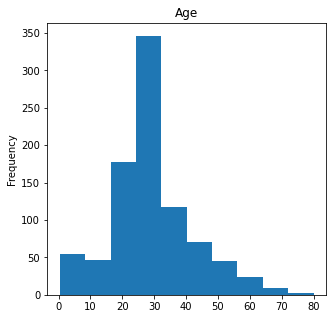

In [ ]:
context = "Age"
print(f"Maximum {context}:", max(train[f"{context}"].unique()))
print(f"Minimum {context}:", min(train[f"{context}"].unique()))
print(f"Average {context}:", round(train[f"{context}"].mean(), 2))
print("Standard Deviation:", round(train[f"{context}"].std(), 2))
print()
train[f"{context}"].plot(kind="hist", figsize=(5,5), title=context)

In [ ]:
# Data exploration on age groups

def gen_age_groups(value):
  if value <= 18:
    return 18
  elif value <= 35:
    return 35
  else:
    return 80

explore_train = train
explore_train["Age"] = explore_train["Age"].map(gen_age_groups)
explore_train.groupby("Age")["Survived"].value_counts()

Age  Survived
18   1            70
     0            69
35   0           346
     1           189
80   0           134
     1            83
Name: Survived, dtype: int64

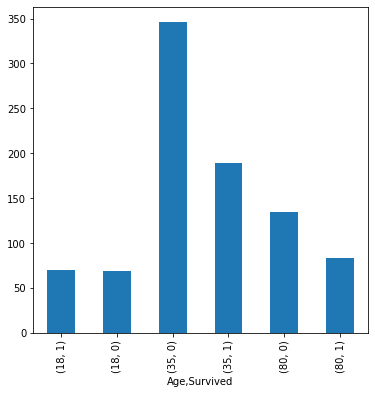

In [ ]:
train.groupby("Age")["Survived"].value_counts().plot(kind="bar", figsize=(6,6))

In [ ]:
for col in train.columns:
  if col == "Survived":
    continue
  else:
    print(f"Correlation of Survived__{col}:", round(train.Survived.corr(train[col]), 4))

# train.corr()

Correlation of Survived__Pclass: -0.3385
Correlation of Survived__Sex: -0.5434
Correlation of Survived__Age: -0.0698
Correlation of Survived__SibSp: -0.0353
Correlation of Survived__Parch: 0.0816
Correlation of Survived__Fare: 0.2573
Correlation of Survived__Embarked: 0.1068


# **Normalization**

In [ ]:
# NORMALIZATION

cols_to_norm = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Embarked"]

train[cols_to_norm]=(train[cols_to_norm]-train[cols_to_norm].mean())/train[cols_to_norm].std()
test[cols_to_norm]=(test[cols_to_norm]-test[cols_to_norm].mean())/test[cols_to_norm].std()

# **DNN**

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layer
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential


train_features = train.drop("Survived", axis="columns").to_numpy()
train_labels = train.Survived.to_numpy()
test_features = test.to_numpy()

In [ ]:
tf.random.set_seed(32)

# 200 epochs --> test accuracy: 0.78468 (top 15% in the Kaggle competition)
model = Sequential([
                    layer.Dense(14, activation="relu"),
                    layer.BatchNormalization(),
                    layer.Dropout(0.4),
                    layer.Dense(28, activation="relu"),
                    layer.BatchNormalization(),
                    layer.Dense(14, activation="relu"),
                    layer.BatchNormalization(),
                    layer.Dropout(0.4),
                    layer.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(train_features, train_labels, epochs=200, verbose=1)

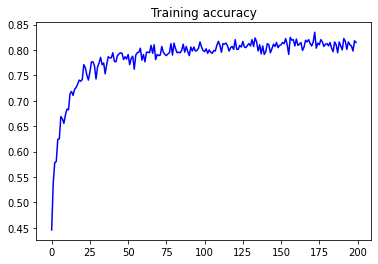

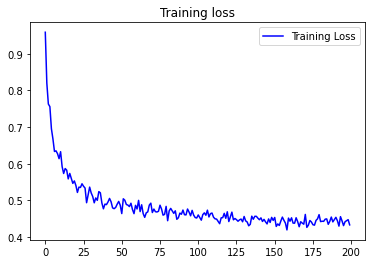

In [ ]:
# Take a look at the training curves of your model

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
predictions = model.predict(test_features)

In [ ]:
survived = []

for p in predictions:
  if p[0] >= 0.8:
    survived.append(1)
  else:
    survived.append(0)

In [ ]:
import os

# remove the old set of predictions
for f in os.listdir():
  if f == "predictions.csv":
    os.system("rm /content/predictions.csv")

results = pd.DataFrame(test_ids, columns=["PassengerId"])
results["Survived"] = survived

results.to_csv("/content/predictions.csv", index=False)

# **Classic ML approaches**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_train = train.drop("Survived",  axis="columns")
y_train = train["Survived"]

x_test = test

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)
logistic_regression.score(x_train, y_train)

0.8080808080808081

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn.score(x_train, y_train)

0.8540965207631874

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)

0.9382716049382716

Experiments:

-  **without** outliers:       LR=0.7968574635241302; KNN=0.8799102132435466; RF=0.9820426487093153;
- **with** outliers:       LR=0.8035914702581369; KNN=0.877665544332211;  RF=0.9820426487093153;

- **without** normalization:  LR=0.8035914702581369; KNN=0.8305274971941639; RF=0.9820426487093153;
- **with** normalization:  LR=0.8035914702581369; KNN=0.877665544332211;  RF=0.9820426487093153;

In [ ]:
final_output = pd.DataFrame(test_ids, columns=["PassengerId"])
final_output["Survived"] = y_pred

final_output.to_csv("/content/predictions.csv", index=False)